In [59]:
import os
import re
import matplotlib.pylab as plt
import numpy as np

In [3]:
os.listdir('results/knn/*execution_time.txt')

FileNotFoundError: [Errno 2] No such file or directory: 'results/knn/*execution_time.txt'

In [7]:


import glob
exectime_knn = glob.glob('results/knn/*execution_time.txt')
exectime_o3 = glob.glob('results/o3/*execution_time.txt')


In [40]:
re.findall(r'knn\/(.*?)_execution_time\.txt', 'results/knn/facebook_detr-resnet-101_execution_time.txt')

['facebook_detr-resnet-101']

In [79]:
knn = {}
o3 = {}

for i in exectime_knn:
    name = re.findall(r'knn\/(.*?)_execution_time\.txt', i)
    print(name, i)
    if len(name) > 0:
        with open(i, 'r') as f:
            num = f.readline()
            knn[name[0]] = float(num)

for i in exectime_o3:
    name = re.findall(r'o3\/(.*?)_execution_time\.txt', i)
    if len(name) > 0:
        with open(i, 'r') as f:
            num = f.readline()
            o3[name[0]] = float(num)

['facebook_detr-resnet-101'] results/knn/facebook_detr-resnet-101_execution_time.txt
['vinai_bertweet-base'] results/knn/vinai_bertweet-base_execution_time.txt
['bert-base-uncased'] results/knn/bert-base-uncased_execution_time.txt
['bert-large-uncased'] results/knn/bert-large-uncased_execution_time.txt
['facebook_detr-resnet-101-dc5'] results/knn/facebook_detr-resnet-101-dc5_execution_time.txt
['microsoft_resnet-50'] results/knn/microsoft_resnet-50_execution_time.txt
['bert-base-multilingual-cased'] results/knn/bert-base-multilingual-cased_execution_time.txt
['prajjwal1_bert-tiny'] results/knn/prajjwal1_bert-tiny_execution_time.txt
['bert-base-cased'] results/knn/bert-base-cased_execution_time.txt
['fxmarty_resnet-tiny-beans'] results/knn/fxmarty_resnet-tiny-beans_execution_time.txt
['facebook_detr-resnet-50'] results/knn/facebook_detr-resnet-50_execution_time.txt
['dslim_bert-base-NER'] results/knn/dslim_bert-base-NER_execution_time.txt


In [42]:
knn

{'facebook_detr-resnet-101': '0.11286616325378418',
 'vinai_bertweet-base': '0.09691882133483887',
 'bert-base-uncased': '0.10234594345092773',
 'bert-large-uncased': '0.7963030338287354',
 'facebook_detr-resnet-101-dc5': '0.11692309379577637',
 'microsoft_resnet-50': '0.1324930191040039',
 'bert-base-multilingual-cased': '0.10004091262817383',
 'prajjwal1_bert-tiny': '0.000827789306640625',
 'bert-base-cased': '0.08564496040344238',
 'fxmarty_resnet-tiny-beans': '0.016459941864013672',
 'facebook_detr-resnet-50': '0.1251509189605713',
 'dslim_bert-base-NER': '0.08940291404724121'}

In [45]:
diffs = {}
for k in o3.keys():
    diffs[k] = float(o3[k]) - float(knn[k])

In [46]:
diffs

{'facebook_detr-resnet-101': 0.05188798904418945,
 'vinai_bertweet-base': -0.03850674629211426,
 'bert-base-uncased': -0.03427410125732422,
 'bert-large-uncased': -0.5737600326538086,
 'facebook_detr-resnet-101-dc5': 0.052327632904052734,
 'microsoft_resnet-50': 0.038315773010253906,
 'bert-base-multilingual-cased': -0.027818918228149414,
 'prajjwal1_bert-tiny': -0.0002474784851074219,
 'bert-base-cased': -0.02962803840637207,
 'fxmarty_resnet-tiny-beans': -0.0004668235778808594,
 'facebook_detr-resnet-50': 0.11383628845214844,
 'dslim_bert-base-NER': -0.037901878356933594}

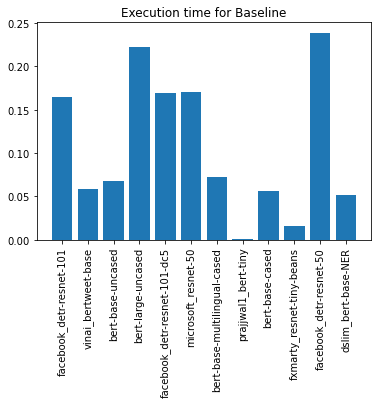

In [80]:
import matplotlib.pyplot as plt

# D = {u'Label1':26, u'Label2': 17, u'Label3':30}

plt.bar(range(len(o3)), list(o3.values()), align='center')
plt.xticks(range(len(o3)), list(o3.keys()), rotation='vertical')
# # for python 2.x:
# plt.bar(range(len(D)), D.values(), align='center')  # python 2.x
# plt.xticks(range(len(D)), D.keys())  # in python 2.x
plt.title('Execution time for Baseline')
plt.show()

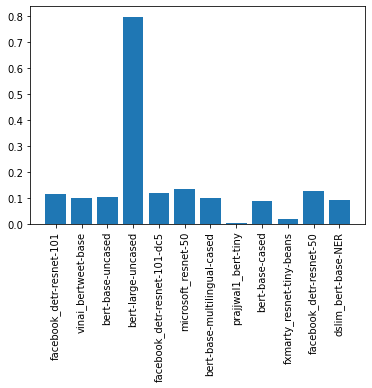

In [81]:
plt.bar(range(len(knn)), list(knn.values()), align='center')
plt.xticks(range(len(knn)), list(knn.keys()), rotation='vertical')
# # for python 2.x:
# plt.bar(range(len(D)), D.values(), align='center')  # python 2.x
# plt.xticks(range(len(D)), D.keys())  # in python 2.x

plt.show()

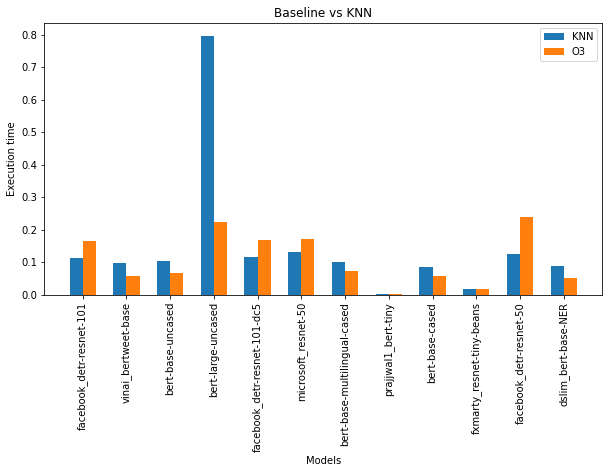

In [82]:

# Position of bars on x-axis
ind = np.arange(len(o3))

# Figure size
plt.figure(figsize=(10,5))

# Width of a bar 
width = 0.3       

# Plotting
plt.bar(ind, list(knn.values()), width, label = 'KNN')
# plt.bar(ind, blue_bar , width, label='Blue bar label')
# plt.bar(ind + width, orange_bar, width, label='Orange bar label')
plt.bar(ind+width, list(o3.values()), width, label = 'O3')

plt.xlabel('Models')
plt.ylabel('Execution time')
plt.title('Baseline vs KNN')

# xticks()
# First argument - A list of positions at which ticks should be placed
# Second argument -  A list of labels to place at the given locations
plt.xticks(ind + width / 2,  list(knn.keys()), rotation='vertical')

# Finding the best position for legends and putting it
plt.legend(loc='best')
plt.show()



In [64]:
o3

{'facebook_detr-resnet-101': '0.16475415229797363',
 'vinai_bertweet-base': '0.05841207504272461',
 'bert-base-uncased': '0.06807184219360352',
 'bert-large-uncased': '0.22254300117492676',
 'facebook_detr-resnet-101-dc5': '0.1692507266998291',
 'microsoft_resnet-50': '0.1708087921142578',
 'bert-base-multilingual-cased': '0.07222199440002441',
 'prajjwal1_bert-tiny': '0.0005803108215332031',
 'bert-base-cased': '0.05601692199707031',
 'fxmarty_resnet-tiny-beans': '0.015993118286132812',
 'facebook_detr-resnet-50': '0.23898720741271973',
 'dslim_bert-base-NER': '0.05150103569030762'}

In [65]:
knn

{'facebook_detr-resnet-101': '0.11286616325378418',
 'vinai_bertweet-base': '0.09691882133483887',
 'bert-base-uncased': '0.10234594345092773',
 'bert-large-uncased': '0.7963030338287354',
 'facebook_detr-resnet-101-dc5': '0.11692309379577637',
 'microsoft_resnet-50': '0.1324930191040039',
 'bert-base-multilingual-cased': '0.10004091262817383',
 'prajjwal1_bert-tiny': '0.000827789306640625',
 'bert-base-cased': '0.08564496040344238',
 'fxmarty_resnet-tiny-beans': '0.016459941864013672',
 'facebook_detr-resnet-50': '0.1251509189605713',
 'dslim_bert-base-NER': '0.08940291404724121'}

In [70]:
# plt.xticks(range(0,3),names)
range(0, 1, 0.1)

TypeError: 'float' object cannot be interpreted as an integer

<ipython-input-75-f8def37ca85b>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(o3, rotation='vertical')


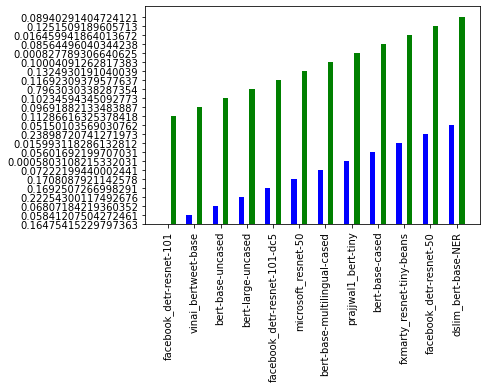

In [75]:
# dictionary = {
#     'Product Name 1' : [10.99,20.99],
#     'Product Name 2' : [50.99,10.99],
#     'Product Name 3' : [40.00,15.99],
#     'Product Name 4' : [50.00],
#     'Product Name 5' : [50.00]
# }
# keys = [key for key in o3.keys()]
# values = [value for value in o3.values()]
fig, ax = plt.subplots()
ax.bar(np.arange(len(o3)) - 0.2 ,list(o3.values()),
       width=0.2, color='b', align='center')
ax.bar(np.arange(len(o3)) + 0.2,
       list(knn.values()),
       width=0.2, color='g', align='center')
ax.set_xticklabels(o3, rotation='vertical')
ax.set_xticks(np.arange(len(o3)))
plt.show()

In [78]:
list(o3.values())[0]

'0.16475415229797363'